In [89]:
import pylab
import numpy as np
import struct
from PIL import Image

In [90]:
def visualise(matr,h_skip = 1,x_skip = 1,shape = [1,1]):
    pylab.figure(figsize = (shape[0],shape[1]))
    pylab.xlabel("x")
    pylab.ylabel("t")
    for i in range(matr.shape[0]):
        if(i % h_skip != 0):
            continue
            
        for j in range(matr.shape[1]):
            if(j % x_skip != 0):
                continue
            
            pylab.plot(j,matr.shape[0] - i,'s',color = (matr[i][j][0]/256,matr[i][j][1]/256,matr[i][j][2]/256))
    pylab.show()

In [139]:
def visualise_alpha(matr,h_skip = 1,x_skip = 1,shape = [1,1]):
    pylab.figure(figsize = (shape[0],shape[1]))
    pylab.xlabel("x")
    pylab.ylabel("t")
    
    max_class = np.max(matr[:,:,3])
    
    for i in range(matr.shape[0]):
        if(i % h_skip != 0):
            continue
            
        for j in range(matr.shape[1]):
            if(j % x_skip != 0):
                continue
                
            
            
            pylab.plot(j,matr.shape[0] - i,'s',color = (matr[i][j][3]/max_class,
                                                        (matr[i][j][3]%2 == 0) + 0,
                                                        1 - matr[i][j][3]/max_class))
    pylab.show()

In [111]:
def load_from_data(filename):

    in_file = open(filename, "rb") # opening for [r]eading as [b]inary
    data = in_file.read()
    in_file.close()

    w, h = struct.unpack("ii", data[:8])

    img_bytes = []
    for i in range(w):
        cur_line = []
        for j in range(0,h,1):
            cur_line.append(struct.unpack("BBBB", data[4*(i*h + j):(4+4*(i*h + j))]))
        img_bytes.append(cur_line) 
        
    return np.array(img_bytes)

In [112]:
img_bytes = load_from_data("rt_1000_1000_1000.data")

In [227]:
def load_from_pil(img,ns = 1000):
    imarr = []
    img = img.resize((ns,ns))
    data = img.getdata()
    
    img_bytes = []
    for i in range(ns):
        cur_line = []
        for j in range(ns):
            cur_line.append(data[i*ns + j])
        img_bytes.append(cur_line)    
        
    return np.array(img_bytes)

In [228]:
im = Image.open("test_img.JPG")
img_bytes = load_from_pil(im)

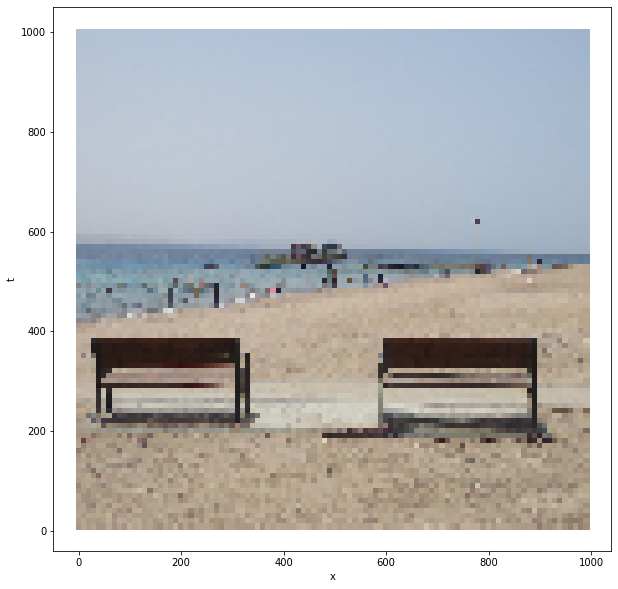

In [166]:
visualise(img_bytes,10,10,shape = [img_bytes.shape[0]/100,img_bytes.shape[0]/100])

In [229]:
def make_file_pair(img_pix,test_name,class_coords):
       
    out_file = open(test_name + ".data", "wb")
    
    w,h = img_pix.shape[:2]
    out_file.write(struct.pack("ii", w,h))
    for i in range(w):
        for j in range(h):
            out_file.write(struct.pack("BBBB", img_bytes[i][j][0],img_bytes[i][j][1],img_bytes[i][j][2],0))        
    
    out_file.close()
    
    out_file = open(test_name + ".input", "w")
    out_file.write(test_name + ".data\n")
    out_file.write("res.data\n")
    out_file.write(str(len(class_coords)) + "\n")
    for line in class_coords:
        out_file.write(str(len(line)) + " ")
        for coords in line:
            out_file.write(str(coords[0]) + " " + str(coords[1]) + " ")
        out_file.write("\n")
    out_file.close()

In [230]:
make_file_pair(img_bytes,"test_test",[[[0,0],[0,10],[40,40]],
                                      [[900,900],[950,900],[880,805]]])

In [226]:
img_bytes = load_from_data("test_test.data")

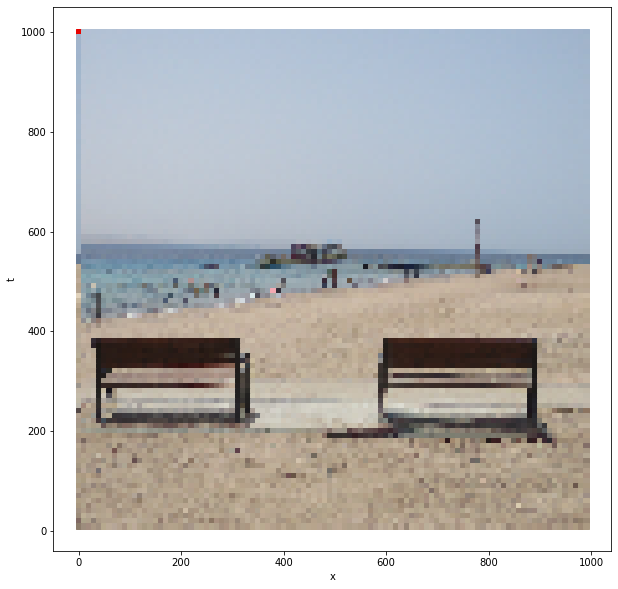

In [130]:
visualise(img_bytes,10,10,shape = [img_bytes.shape[0]/100,img_bytes.shape[0]/100])

In [213]:
def build_net(side =1000, step = 50):
    net = []
    for i in range(side):
        nl = []
        for j in range(side):
            if(i%step == 0 and j%step == 0):
                nl.append([i,j])
        if(i%step == 0):
            net.append(nl)
        
    return net

In [266]:
im = Image.open("img_9.jpg")
img_bytes = load_from_pil(im)

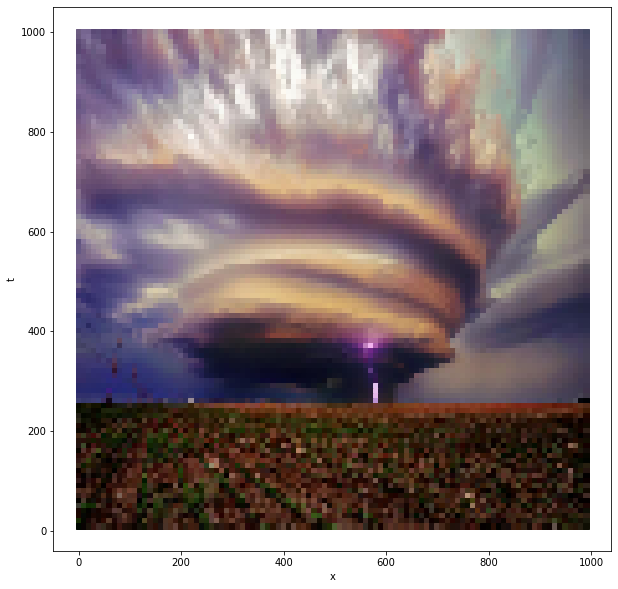

In [236]:
visualise(img_bytes,10,10,shape = [img_bytes.shape[0]/100,img_bytes.shape[0]/100])

In [267]:
make_file_pair(img_bytes,"test_9",build_net())

In [268]:
img_bytes = load_from_data("res.data")

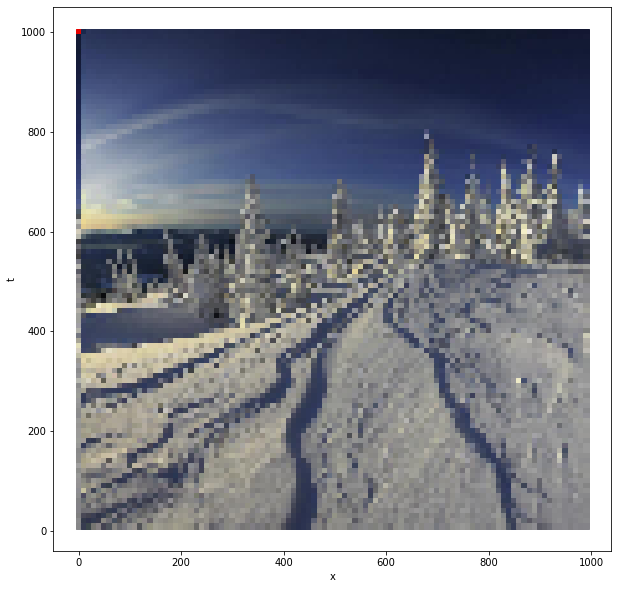

In [269]:
visualise(img_bytes,10,10,shape = [img_bytes.shape[0]/100,img_bytes.shape[0]/100])

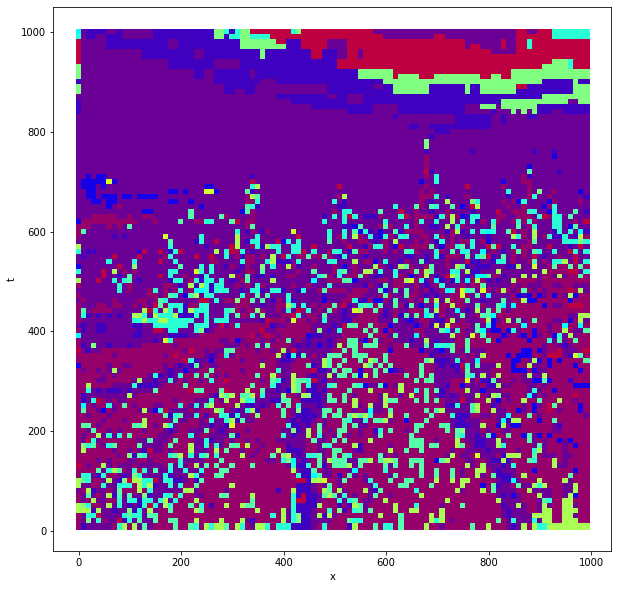

In [270]:
visualise_alpha(img_bytes,10,10,shape = [img_bytes.shape[0]/100,img_bytes.shape[0]/100])